In [6]:
# import libraries
from IPython.display import display, Latex
import yaml
import numdifftools as nd
import math
from yaml.loader import SafeLoader
# import pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns
from math import *
import os
import sys
sys.path.insert(0, '..') # workers on parent dir
import workers
import piecewise_regression # https://github.com/chasmani/piecewise-regression
import random

In [7]:
root="H1T4-PFOS-K-1"
df=pd.read_csv("df."+root+".saved.csv.gz",index_col=[0,1,2])
display(df)

TimeStep    v_time  v_systemp      v_p  v_sysvol  \
NTensio runNb index                                                      
15      1     0            100      1.01    1.00569  69.4739    451458   
              1            200      3.01    1.00916  69.4800    451458   
              2            300      5.01    1.01033  69.4801    451458   
              3            400      7.01    1.00959  69.4792    451458   
              4            500      9.01    1.01014  69.4781    451458   
...                        ...       ...        ...      ...       ...   
195     3     14995    1499600  29991.00    1.01032  69.4754    141072   
              14996    1499700  29993.00    1.00990  69.4701    141072   
              14997    1499800  29995.00    1.01008  69.4821    141072   
              14998    1499900  29997.00    1.00914  69.4734    141072   
              14999    1500000  29999.00    1.01011  69.4794    141072   

                     v_sysdensity  v_etotal     v_pe     v_ke  v_evdwl  \
NTensio runNb index                                                      
15      1     0           2.99890   14.0289  12.5204  1.50854  12.5203   
              1           2.99890   14.0376  12.5238  1.51373  12.5238   
              2           2.99890   14.0405  12.5251  1.51549  12.5250   
              3           2.99890   14.0392  12.5248  1.51438  12.5247   
              4           2.99890   14.0405  12.5253  1.51522  12.5252   
...                           ...       ...      ...      ...      ...   
195     3     14995       2.99848   14.0430  12.5275  1.51548  12.5251   
              14996       2.99848   14.0423  12.5275  1.51485  12.5251   
              14997       2.99848   14.0422  12.5271  1.51512  12.5247   
              14998       2.99848   14.0401  12.5264  1.51371  12.5240   
              14999       2.99848   14.0418  12.5267  1.51516  12.5243   

                      v_ebond  v_eangle     v_coulomb  v_waterInVc   f_walls  \
NTensio runNb index                                                            
15      1     0      0.000020  0.000030 -5.276110e-08       921929  0.031156   
              1      0.000022  0.000029 -6.316750e-08       921978  0.497136   
              2      0.000022  0.000033 -1.101970e-07       921974  0.264275   
              3      0.000022  0.000031 -1.633490e-07       922072  0.054742   
              4      0.000025  0.000032 -2.199200e-07       921879  0.103369   
...                       ...       ...           ...          ...       ...   
195     3     14995  0.000881  0.001400  1.152670e-04       238588  7.527810   
              14996  0.000902  0.001337  1.291740e-04       238652  4.749610   
              14997  0.000899  0.001309  1.312870e-04       238658  6.119970   
              14998  0.000903  0.001380  1.068490e-04       238629  6.324170   
              14999  0.000888  0.001344  8.485180e-05       238675  4.883730   

                     v_osmoticPressure   v_VcVol  
NTensio runNb index                               
15      1     0               0.000018  307507.0  
              1               0.000112  307507.0  
              2               0.000069  307507.0  
              3               0.000029  307507.0  
              4               0.000039  307507.0  
...                                ...       ...  
195     3     14995           0.002943   80000.0  
              14996           0.001889   80000.0  
              14997           0.002130   80000.0  
              14998           0.002595   80000.0  
              14999           0.002214   80000.0  

[765000 rows x 17 columns]

# Osmotic pressure and uncertainty using rolling averages

In [8]:
# Constants
Na = 6.02214e23 # Avogadro constant
NuH2O=30e-30    # 30 A^3
kB=1.3806e-23 # J/K
R=8.3145 # J/K/mol --> kB * Na
Rho=3           # Number density
Nm=3            # CG level (#H2O/bead) 
NuH2O=30e-30    # 30 A^3
rc=6.4633E-10 # m
T=298

dfFinal, dfFinalMerged = workers.statsPosmoH1TnNa(df=df, rho=3.0, Vc=None,rc=rc, NuH2O=NuH2O, T=T)
del df

All the simulations have the same length with 15000 frames


runNb  Pos mean Pos error Pos error #blocs  \
C (mol/L) Cm (mol/kg) NTensio                                               
0.000300  0.000301    15           3  0.000098  0.000004            715.0   
                      15           1  0.000093  0.000004            715.0   
                      15           2  0.000099  0.000004            715.0   
0.000500  0.000502    16           1  0.000158  0.000005            682.0   
                      16           2  0.000155  0.000006            715.0   
                      16           3   0.00016  0.000005            682.0   
0.000700  0.000703    17           3  0.000233  0.000007            715.0   
                      17           2  0.000221  0.000007            682.0   
                      17           1  0.000231  0.000007            715.0   
0.000900  0.000903    18           2  0.000297  0.000009            682.0   
                      18           3   0.00029  0.000009            715.0   
                      18           1  0.000294  0.000009            682.0   
0.001100  0.001104    19           1  0.000306  0.000009            715.0   
                      19           2  0.000343   0.00001            715.0   
                      19           3  0.000334   0.00001            715.0   
0.001300  0.001305    20           1  0.000412  0.000011            715.0   
                      20           2  0.000387  0.000011            715.0   
                      20           3  0.000416  0.000011            715.0   
0.001500  0.001506    21           1  0.000393   0.00001            715.0   
                      21           3  0.000452  0.000011            715.0   
                      21           2  0.000461  0.000012            653.0   
0.001691  0.001698    22           3  0.000451  0.000012            715.0   
                      22           2  0.000476  0.000012            715.0   
                      22           1  0.000515  0.000013            715.0   
0.001922  0.001930    25           3  0.000474  0.000013            715.0   
                      25           1  0.000459  0.000012            715.0   
                      25           2  0.000507  0.000012            715.0   
0.002076  0.002084    27           1  0.000496  0.000013            715.0   
                      27           3  0.000507  0.000013            715.0   
                      27           2  0.000564  0.000013            715.0   
0.002998  0.003011    39           2   0.00066  0.000014            715.0   
                      39           1  0.000729  0.000015            715.0   
                      39           3  0.000711  0.000015            715.0   
0.005996  0.006027    78           2  0.000876  0.000016            715.0   
                      78           3  0.000931  0.000018            715.0   
                      78           1  0.000962  0.000017            682.0   
0.007688  0.007731    100          2  0.001037  0.000017            715.0   
                      100          3  0.001153  0.000018            715.0   
0.008995  0.009049    117          3  0.001163  0.000019            715.0   
                      117          1  0.001203  0.000019            715.0   
                      117          2  0.001226  0.000019            653.0   
0.010378  0.010445    135          2  0.001405  0.000022            715.0   
                      135          3  0.001446   0.00002            715.0   
0.011993  0.012075    156          1  0.001472  0.000019            715.0   
                      156          2  0.001437   0.00002            715.0   
                      156          3  0.001379  0.000019            715.0   
0.013069  0.013163    170          3  0.001494  0.000021            715.0   
                      170          2   0.00158  0.000021            715.0   
0.014991  0.015106    195          1  0.001549  0.000021            715.0   
          0.015107    195          3   0.00172  0.000022            715.0   
                      195  

,C (mol/L),log(C (mol/L)),Cm (mol/kg),NTensio,Pos mean (bar),Pos error,Pos +,Pos -,Phi mean,Phi error,Phi -,Phi +
0,0.000300,-8.111727,0.000301,15,0.014743,0.000555,0.015298,0.014188,0.991765,0.037335,0.954430,1.029100
1,0.000500,-7.600904,0.000502,16,0.024012,0.000815,0.024826,0.023197,0.969140,0.032885,0.936255,1.002025
2,0.000700,-7.264432,0.000703,17,0.034789,0.001102,0.035891,0.033688,1.002961,0.031766,0.971195,1.034727
3,0.000900,-7.013117,0.000903,18,0.044731,0.001351,0.046082,0.043380,1.002998,0.030302,0.972695,1.033300
4,0.001100,-6.812447,0.001104,19,0.049944,0.001446,0.051390,0.048497,0.916267,0.026531,0.889736,0.942798
5,0.001300,-6.645391,0.001305,20,0.061695,0.001689,0.063384,0.060006,0.957720,0.026217,0.931502,0.983937
6,0.001500,-6.502290,0.001506,21,0.066344,0.001754,0.068098,0.064590,0.892573,0.023599,0.868973,0.916172
7,0.001691,-6.382264,0.001698,22,0.073231,0.001859,0.075089,0.071372,0.873794,0.022177,0.851617,0.895971
8,0.001922,-6.254430,0.001930,25,0.073118,0.001890,0.075007,0.071228,0.767751,0.019843,0.747908,0.787594
9,0.002076,-6.177469,0.002084,27,0.079618,0.001988,0.081606,0.077630,0.774080,0.019326,0.754754,0.793406


___
# Piecewise regression
Python module https://joss.theoj.org/papers/10.21105/joss.03859
The general form of the model
with one breakpoint is

y = αx + c + β(x − ψ)H(x − ψ) + ζ , (1)

where given some data, x, y, we are trying to estimate the gradient of the first segment, α, the
intercept of the first segment, c, the change in gradient from the first to second segments, β,
and the breakpoint position, ψ. H is the Heaviside step function and ζ is a noise term. This
cannot be solved directly through linear regression as the relationship is non-linear. We can
take a linear approximation by a Taylor expansion around some initial guess for the breakpoint,
ψ,

y ≈ αx + c + β(x − ψ
(0))H(x − ψ
(0)) − β(ψ − ψ
(0))H(x − ψ
(0)) + ζ

This is now a linear relationship and we can find a new breakpoint estimate, ψ
(1), through ordinary linear regression using the statsmodels python package (Seabold & Perktold, 2010).
We iterate in this way until the breakpoint estimate converges, at which point we stop the
algorithm. If considering multiple breakpoints, the same approach is followed using a multivariate Taylor expansion around an initial guess for each of the breakpoints

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 
Running fit with n_breakpoint = 6 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                    -425.74         True     0.010357 
1                    -492.61         True    0.0023919 
2                    -492.66         True    0.0020483 
3                    -488.55         True     0.001903 
4                    -476.93         True    0.0020483 
5                    -472.66         True     0.001909 
6                                   False              

Min BIC (Bayesian Information Criterion) suggests best model
The best number accuracy is obtained using 2

'The CMC found is 1.3e-03 ± 4.8e-04 mol/L'

(0.0012833528872645402, 0.00048354598385079927)

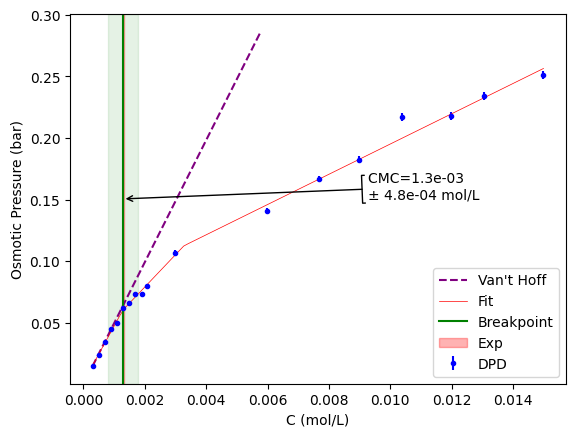

In [9]:
workers.plotCMC(dfFinal, dfFinalMerged, xC="C (mol/L)",
 yC="Pos mean (bar)", yLabel="Osmotic Pressure (bar)", VH=True, bp=6, bpN=1, down=0, up=1, exp=[1.30e-03, 1.34e-03])

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 
Running fit with n_breakpoint = 6 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                    -238.43         True      0.40762 
1                    -307.33         True     0.090473 
2                    -306.02         True     0.079564 
3                    -308.32         True     0.065189 
4                    -285.17         True     0.087979 
5                     -277.3         True     0.087979 
6                                   False              

Min BIC (Bayesian Information Criterion) suggests best model
The best number accuracy is obtained using 3

'The CMC found is 9e-04 ± 3e-04 mol/L'

(0.0009019284418701204, 0.00034204699008464045)

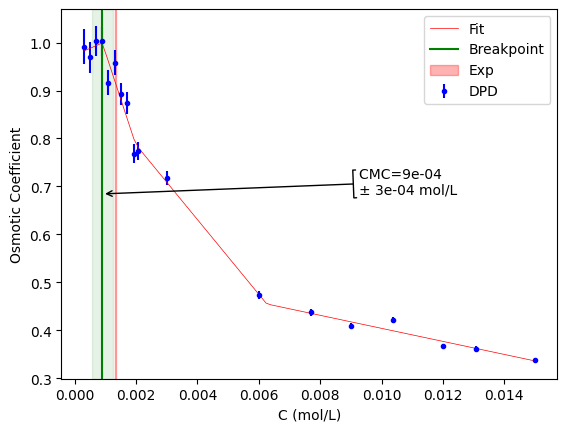

In [10]:
workers.plotCMC(dfFinal, dfFinalMerged, xC="C (mol/L)", yC="Phi mean",
 yCerr="Phi error", yLabel="Osmotic Coefficient", VH=False, bp=6, down=0.000, up=1, exp=[1.30e-03, 1.34e-03])